# backpropagation and visualization of the neural network weights



In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load datasets

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv(data_dir / "regression" / "steps-small-training.csv", index_col=0)
steps_small_test = pd.read_csv(data_dir / "regression" / "steps-small-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")


# square simple train

visualisation of neural network weights will be done using a basic barplot

In [3]:
layers = [
    {"output_dim": 5, "activation": "sigmoid"},
    {"activation": "linear"}
]

mlp = networks.MLP(layers, input=square_simple_train[["x"]])


In [4]:
mlp.layers[0].weights

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864]])

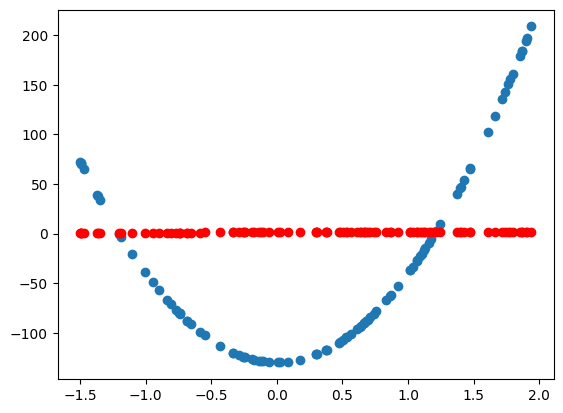

In [5]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)

plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], y_hat.T, color="red")

In [6]:
mlp.layers[0].weights[:, 0]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

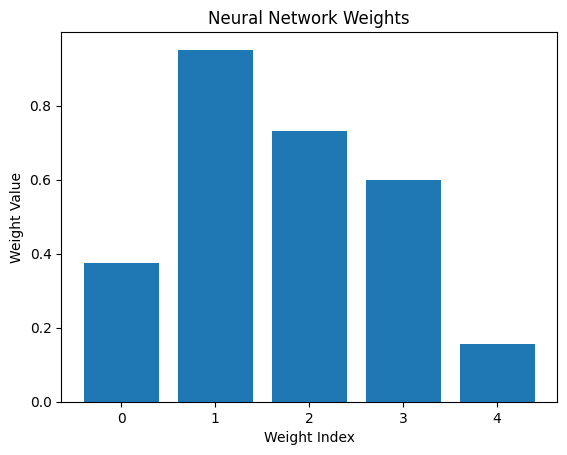

In [7]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

[0.15599452]
[0.05808361]
[0.86617615]
[0.60111501]
[0.70807258]


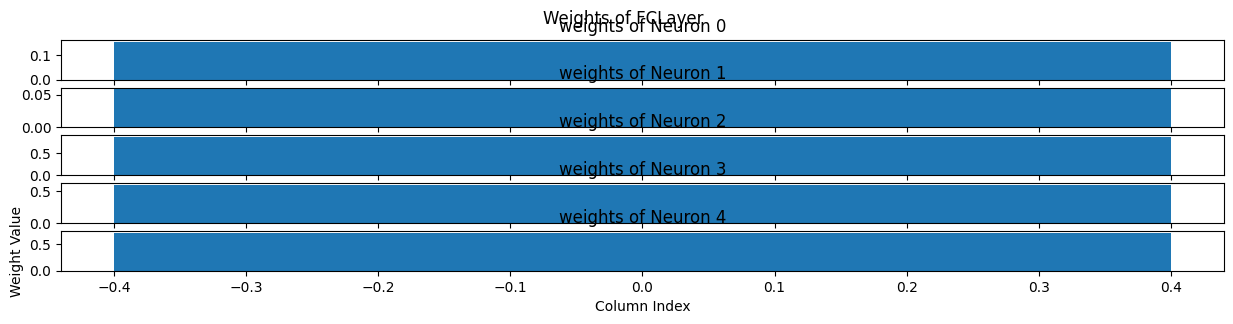

In [8]:
mlp.layers[1].plot_weights()

now we want to calculate the partial derivative over the layers


In [9]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy())
mlp.layers[0].weights -= 1 * dw[0]
mlp.layers[0].bias -= 1 * db[0]

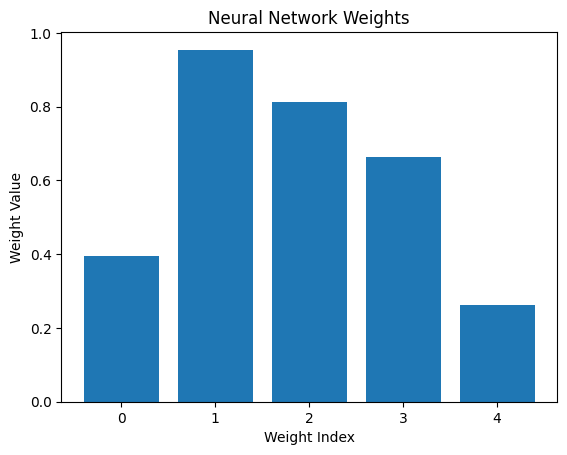

In [10]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

In [11]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

In [12]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.01, epochs=5000)

plt.plot(losses)

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('O') to dtype('float64') with casting rule 'same_kind'

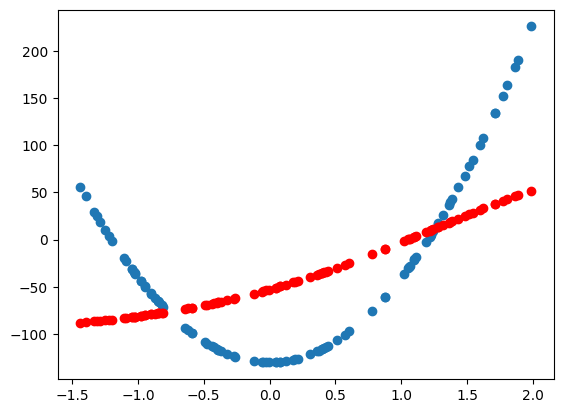

In [23]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

In [19]:
square_simple_test_norm["y"].shape
y_hat.flatten().shape


(100,)

In [20]:
mse = np.mean((square_simple_test["y"] - norm.denorm(y_hat.T, index="y").flatten())**2)
mse

19559.232107869604

In [31]:
weights = mlp.layers[0].weights

weights

array([[ 1.35642417],
       [ 1.78200425],
       [ 1.37229551],
       [ 1.46114819],
       [ 0.33742435],
       [ 1.27661647],
       [-1.56328194],
       [ 1.49939525],
       [ 1.35626665],
       [ 1.46675003],
       [-1.57343525],
       [ 2.88981463],
       [ 1.46442342],
       [ 1.25340459],
       [ 0.5085176 ]])

more layers

In [24]:
layers = [
    {"output_dim": 15, "activation": "sigmoid", "init": "uniform"},
    {"output_dim": 5, "activation": "sigmoid", "init": "uniform"},
    {"activation": "linear"}
]

norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

mlp = networks.MLP(layers, input=square_simple_train_norm[["x"]])

Epoch: 0, Loss: 5.045975364993687
Epoch: 100, Loss: 0.9898105565948622
Epoch: 200, Loss: 0.9938764719815413
Epoch: 300, Loss: 0.9848114142015523
Epoch: 400, Loss: 0.9868770076359644
Epoch: 500, Loss: 0.9884432943891713
Epoch: 600, Loss: 0.9738847576240017
Epoch: 700, Loss: 0.9651992731751693
Epoch: 800, Loss: 0.9477559839947465
Epoch: 900, Loss: 0.9449499646584986
Epoch: 1000, Loss: 0.8605933334767317
Epoch: 1100, Loss: 0.741503697551402
Epoch: 1200, Loss: 0.6512568479594081
Epoch: 1300, Loss: 0.5558996181648418
Epoch: 1400, Loss: 0.4908928837318855
Epoch: 1500, Loss: 0.44412593525611777
Epoch: 1600, Loss: 0.4054476980887699
Epoch: 1700, Loss: 0.3777445095201809
Epoch: 1800, Loss: 0.3580681263105543
Epoch: 1900, Loss: 0.3429861709674335
Epoch: 2000, Loss: 0.3291814825367424
Epoch: 2100, Loss: 0.31889044392130134
Epoch: 2200, Loss: 0.31149582721012703
Epoch: 2300, Loss: 0.305600455468395
Epoch: 2400, Loss: 0.29869450077065446
Epoch: 2500, Loss: 0.2943977305616008
Epoch: 2600, Loss: 0.29

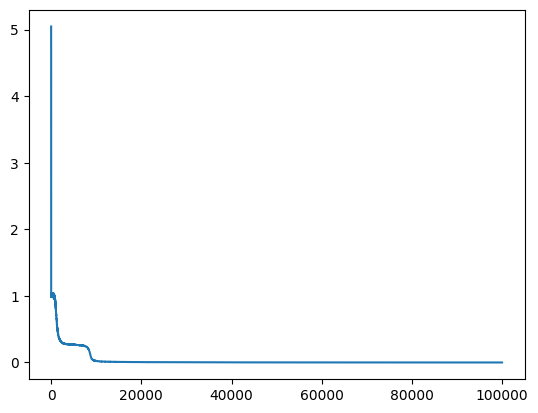

In [25]:
losses = mlp.minibatch_train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.05, epochs=100000, batch_size=16)
plt.plot(losses)

MSE on test data:  1.054724404028812


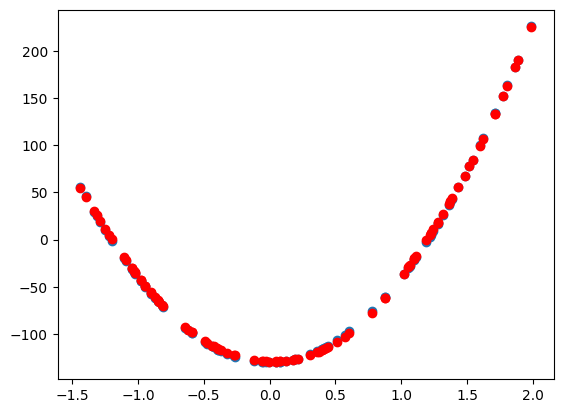

In [27]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

y_hat_denorm = norm.denorm(y_hat.T, index="y").flatten()
plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], y_hat_denorm, color="red")

mse = np.mean((square_simple_test["y"] - y_hat_denorm)**2)
print("MSE on test data: ", mse)

thats enough small MSE

## steps small 

In [29]:
layers = [
    {"output_dim": 10, "activation": "relu", "init_method": "he"},
    #{"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init_method": "uniform"},

    {"activation": "linear"}
]



norm_steps = networks.assets.Normalizator(steps_small_train)
steps_small_train_norm = norm_steps(steps_small_train)
steps_small_test_norm = norm_steps(steps_small_test)

mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


Epoch: 0, Loss: 10.963958958715802
Epoch: 100, Loss: 0.07326795383934742
Epoch: 200, Loss: 0.05471631667457194
Epoch: 300, Loss: 0.05451736827781836
Epoch: 400, Loss: 0.05437094527402791
Epoch: 500, Loss: 0.05424160754111489
Epoch: 600, Loss: 0.05412633596344874
Epoch: 700, Loss: 0.05402281601920166
Epoch: 800, Loss: 0.053929218238703974
Epoch: 900, Loss: 0.053844077636561814
Epoch: 1000, Loss: 0.05376620742806718
Epoch: 1100, Loss: 0.05369463613629863
Epoch: 1200, Loss: 0.05362856101974433
Epoch: 1300, Loss: 0.05356731308841503
Epoch: 1400, Loss: 0.053510330479903445
Epoch: 1500, Loss: 0.05345713795416041
Epoch: 1600, Loss: 0.0534073309263308
Epoch: 1700, Loss: 0.05336056290656744
Epoch: 1800, Loss: 0.05331653552655777
Epoch: 1900, Loss: 0.053275048083029054
Epoch: 2000, Loss: 0.053235975612645946
Epoch: 2100, Loss: 0.05319910359093195
Epoch: 2200, Loss: 0.0531642452243314
Epoch: 2300, Loss: 0.05313123647548184
Epoch: 2400, Loss: 0.05309993268593244
Epoch: 2500, Loss: 0.05307020577130

Text(0.5, 1.0, 'Training Loss')

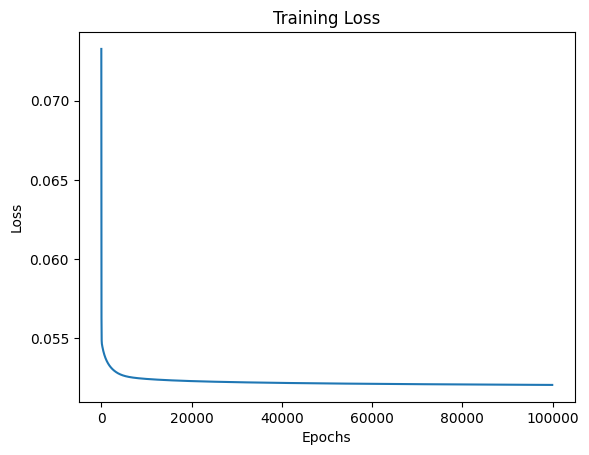

In [28]:
mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


losses = mlp_steps.train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 
                         epochs=100000, learning_rate = 0.5, momentum_rate = 0.5)
# losses = mlp_steps.minibatch_train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on train data:  360.9143912083392


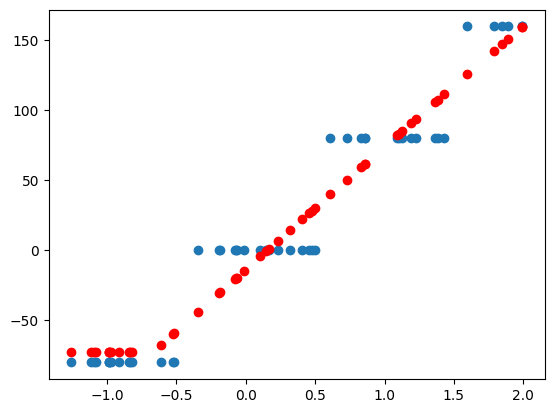

In [26]:
y_hat = mlp_steps.full_forward_pass(steps_small_train_norm[["x"]].T)

plt.scatter(steps_small_train["x"], steps_small_train["y"])
plt.scatter(steps_small_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  51.882475338991455


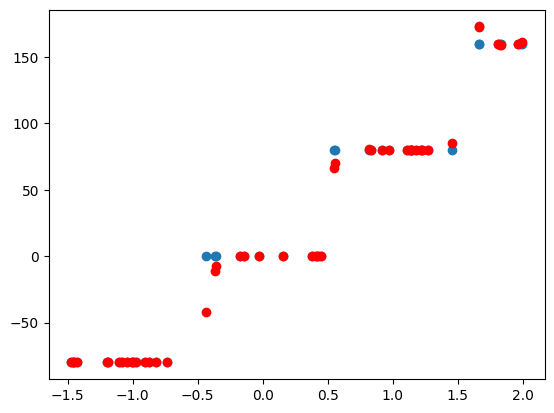

In [33]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

In [17]:
import pickle
# Specify the file path where you want to save the pickle file
file_path = "steps_weights.pkl"

# Save the weights_global variable as a pickle file
with open(file_path, "rb") as file:
    weights_global = pickle.load(file)

for i in range(len(mlp_steps.layers)):
    print("Layer ", i)
    print("Weights: ", weights_global[i][0].shape)
    print("Biases: ", weights_global[i][1].shape)
    mlp_steps.layers[i].weights = weights_global[i][0]
    mlp_steps.layers[i].biases = weights_global[i][1]

FileNotFoundError: [Errno 2] No such file or directory: 'steps_weights.pkl'

MSE on test data:  58836.411861522254


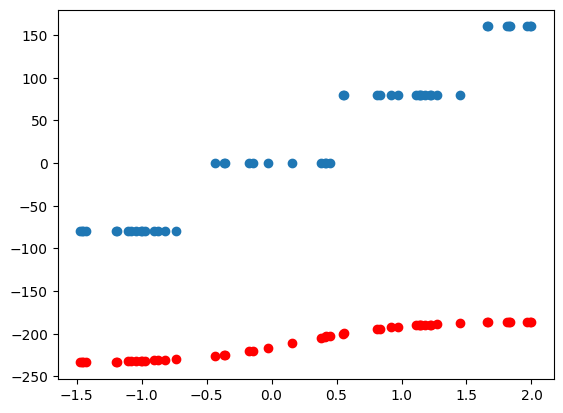

In [34]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

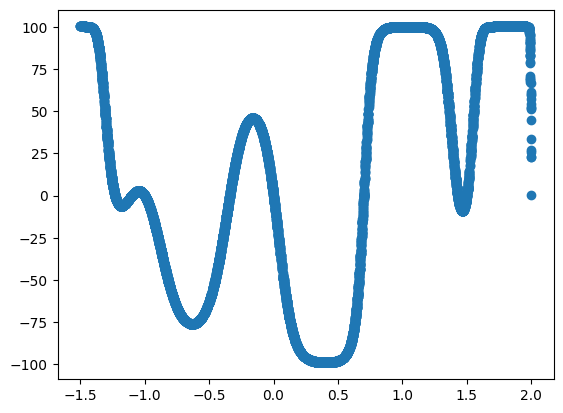

In [3]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

10000

In [9]:
layers = [
    {"output_dim": 50, "activation": "relu", "init_method": "xavier"},
    {"output_dim": 5, "activation": "relu", "init_method": "xavier"},
    {"output_dim": 5, "activation": "relu", "init_method": "xavier"},
    {"activation": "linear"}
]



mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]])


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), epochs=10000, mod="", learning_rate=0.1, momentum_rate=0.1)

Epoch: 0, Loss: 1481.0632806787114
Epoch: 100, Loss: 19.797573120412768
Epoch: 200, Loss: 8.205425303265729
Epoch: 300, Loss: 5.059850448033416
Epoch: 400, Loss: 3.6679110769215755
Epoch: 500, Loss: 2.921984337291427
Epoch: 600, Loss: 2.4572702788259098
Epoch: 700, Loss: 2.13313234781663
Epoch: 800, Loss: 1.898578810667715
Epoch: 900, Loss: 1.7248320546159652
Epoch: 1000, Loss: 1.5922840591877012
Epoch: 1100, Loss: 1.4890332227412257
Epoch: 1200, Loss: 1.4073508620904496
Epoch: 1300, Loss: 1.3416243944343784
Epoch: 1400, Loss: 1.2880400984200038
Epoch: 1500, Loss: 1.243828506633779
Epoch: 1600, Loss: 1.2066792175238998
Epoch: 1700, Loss: 1.1752522405317483
Epoch: 1800, Loss: 1.1483940104952055
Epoch: 1900, Loss: 1.1252059160330747
Epoch: 2000, Loss: 1.1051934316426624
Epoch: 2100, Loss: 1.087757732033042
Epoch: 2200, Loss: 1.0723985114347787
Epoch: 2300, Loss: 1.0588073342840991
Epoch: 2400, Loss: 1.0467201718890453
Epoch: 2500, Loss: 1.035933274345987
Epoch: 2600, Loss: 1.026291044474

In [13]:
losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), epochs=10000, mod="stocastic", batch_size=32, learning_rate=0.1, momentum_rate=0.01)

Text(0.5, 1.0, 'Training Loss')

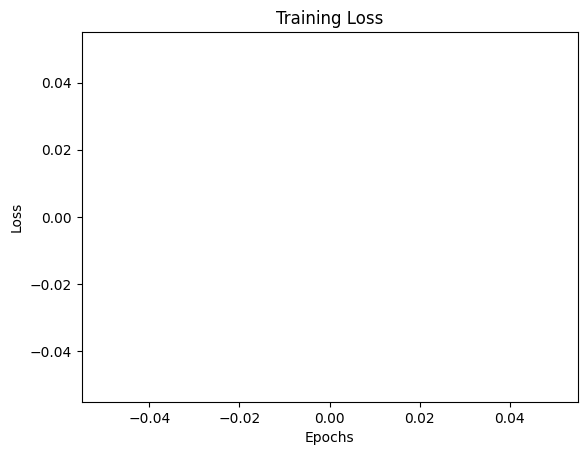

In [14]:
plt.plot(losses[1000:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on test data:  1915147.8291699227


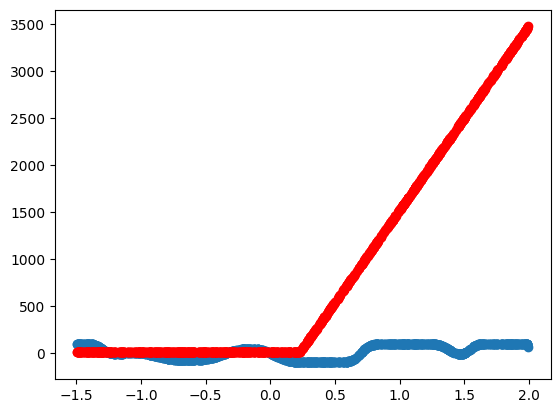

In [10]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T)

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)